In [38]:
using Catalyst
using Random, Plots
@parameters β r
rs = @reaction_network begin
   β, S + I --> 2*I
   r, I --> R
end β r
jumpsys = convert(JumpSystem,rs)

Model ##ReactionSystem#265 with 2 equations
States (3):
  S(t)
  I(t)
  R(t)
Parameters (2):
  β
  r

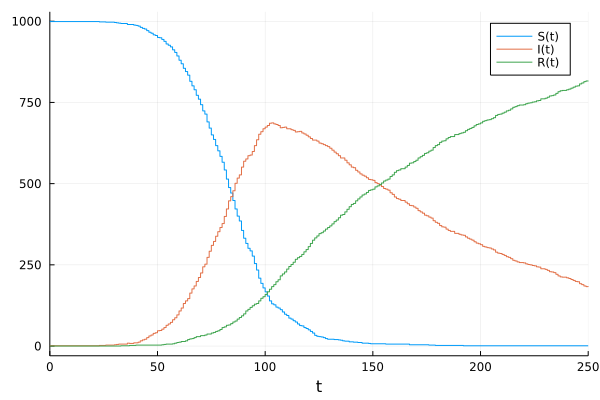

In [39]:
using DiffEqJump, OrdinaryDiffEq
dprob = DiscreteProblem(jumpsys,[999.0,1.0,0.0],(0.0,250.0),[1e-4,1e-2])
jump_prob = JumpProblem(jumpsys, dprob, Direct(), save_positions=(false,false), rng= Random.seed!(1234))
sol = solve(jump_prob,SSAStepper(),saveat=1.)
plot(sol)

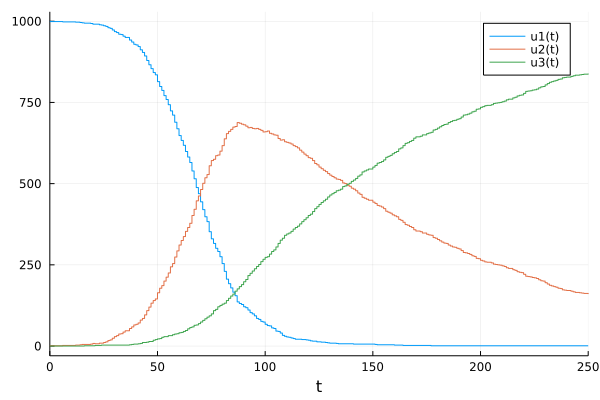

In [40]:
rates1 = [0.1/1000.0]
reactant_stoich1 = [[1=>1,2=>1]]
net_stoich1 = [[1=>-1,2=>1]]
jump1_ = MassActionJump(rates1, reactant_stoich1, net_stoich1; scale_rates = false)

rates = [0.01]
reactant_stoich = [[2 => 1]]
net_stoich = [[2 => -1,3 => 1]]
jump2_ = MassActionJump(rates, reactant_stoich, net_stoich; scale_rates = false)

prob2 = DiscreteProblem([999.0,1.0,0.0],(0.0,250.0))
jump_prob2 = JumpProblem(prob2,Direct(),jump1_,jump2_, save_positions=(false,false),rng= Random.seed!(1234))
integrator = init(jump_prob2,FunctionMap())
sol2 = solve(jump_prob2,SSAStepper(),saveat=1.)
plot(sol2)